In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from model import Model
from matplotlib import pyplot as plt
import pandas as pd
np.random.seed(0)
from utils import plot_loss_histories_one_plot_log, plot_loss_histories_one_plot, plot_loss_histories, run_experiment

## Generated dataset


In [2]:
n_samples = 1000 
n_features = 10  
X_train = np.random.randn(n_samples, n_features)
y_train = np.random.choice([-1, 1], size=n_samples)

In [3]:
for i in [100, 200, 300, 400, 500, 800]:
    accuracies, loss_histories, optimal_params = run_experiment(X_train, y_train, iter_=1, max_iter=i, methods_=['COBYLA'])
    print(pd.DataFrame(optimal_params))

                                                         COBYLA
Minimum loss                                          76.584073
Optimal b                                              0.042646
Optimal n     [0.05638618955188984, 0.09746455650283177, 4.1...
Optimal p     [0.11914446549666644, -2.871970659103995e-16, ...
Optimal w     [-0.06275827594477659, 0.09746455650283206, 5....
                                                         COBYLA
Minimum loss                                          72.842983
Optimal b                                               0.03467
Optimal n     [-3.122502256758253e-17, 0.14381758826767477, ...
Optimal p     [-7.51623156075576e-17, 5.0090140368830305e-17...
Optimal w     [4.393729303997507e-17, 0.1438175882676747, -0...
                                                         COBYLA
Minimum loss                                          77.426184
Optimal b                                             -0.058937
Optimal n     [1.2864489380557151, 0.152

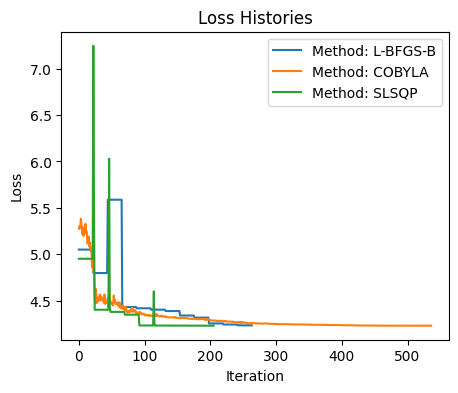

In [4]:
plot_loss_histories_one_plot_log(loss_histories)

## UCI Dataset

### Breast Cancer Wisconsin Diagnostic

In [108]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()
y = breast_cancer_wisconsin_diagnostic.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {'M': -1, 'B': 1}
y = np.vectorize(label_mapping.get)(y)

In [109]:
accuracies, loss_histories, optimal_params = run_experiment(X, y, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.439782558938086e-18, 1.3825798566537129e-17...","[2.5347340213145635e-13, 1.1737412475650193e-1..."
Optimal p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.77667176...","[0.7475877031988106, -1.8012817255514036e-16, ...","[1.9599142795639849e-13, 2.782821141977163e-13..."
Optimal w,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7766717...","[-0.7475877031988106, 1.9395397112167748e-16, ...","[5.748197417505786e-14, -1.609079894412144e-13..."
Optimal b,0.68269,0.593245,0.682556
Minimum loss,15.253244,15.544524,15.253244


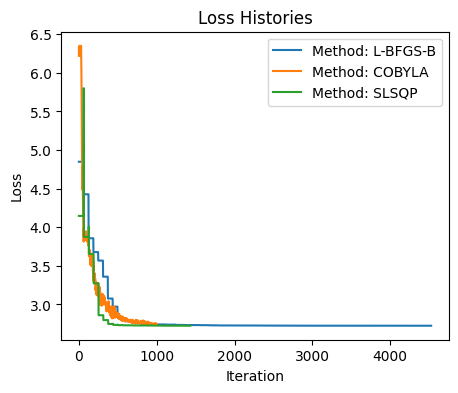

In [110]:
plot_loss_histories_one_plot_log(loss_histories)

In [112]:
accuracies_breast_cancer, loss_histories_breast_cancer, optimal_params = run_experiment(X, y)
average_accuracies_breast_cancer = {method: np.mean(values) for method, values in accuracies_breast_cancer.items()}

/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:26: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:26: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)
/Users/zosia/Desktop/Optimization-in-Data-Analysis/model.py:26: RuntimeWarning: overflow encountered in exp
  loss = self.C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, n-p) + b)))) + np.sum(n + p)


### Banknote Authentication

In [113]:
banknote_authentication = fetch_ucirepo(id=267) 
  
X = banknote_authentication.data.features.to_numpy()
y = banknote_authentication.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)

In [114]:
accuracies, loss_histories, optimal_params = run_experiment(X, y, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.0, 0.0]","[-1.6486339909823174e-20, -1.6486126202485922e...","[8.39377872300517e-15, 4.154217092924354e-15, ..."
Optimal p,"[3.5360198909261658, 3.3697164393580907, 2.989...","[3.5359965479535833, 3.3697458235551094, 2.989...","[3.5359739913152253, 3.369397582769655, 2.9889..."
Optimal w,"[-3.5360198909261658, -3.3697164393580907, -2....","[-3.5359965479535833, -3.3697458235551094, -2....","[-3.535973991315217, -3.369397582769651, -2.98..."
Optimal b,-0.901683,-0.901644,-0.901452
Minimum loss,17.385546,17.385546,17.385546


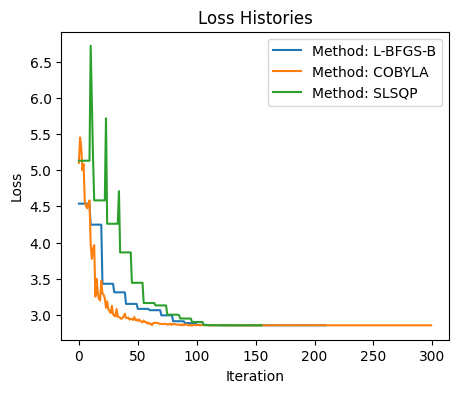

In [117]:
plot_loss_histories_one_plot_log(loss_histories)

In [116]:
accuracies_banknote, loss_histories_banknote, optimal_params = run_experiment(X, y)
average_accuracies_banknote = {method: np.mean(values) for method, values in accuracies_banknote.items()}

### Spambase

In [118]:
spambase = fetch_ucirepo(id=94) 
  
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy().ravel()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

label_mapping = {0: -1, 1: 1}
y = np.vectorize(label_mapping.get)(y)

In [119]:
accuracies, loss_histories, optimal_params = run_experiment(X, y, iter_=1)
pd.DataFrame(optimal_params)

,L-BFGS-B,COBYLA,SLSQP
Optimal n,"[0.0, 0.0, 0.04407761854681822, 0.006202232050...","[-4.977456976882525e-16, 8.673617379884035e-17...","[3.2910071082235366e-13, 3.151046199611042e-13..."
Optimal p,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09654967918206998, 0.042620507076443985, 9....","[4.058244265459108e-13, 1.249333591149537e-13,..."
Optimal w,"[0.0, 0.0, 0.04407761854681822, 0.006202232050...","[-0.09654967918207048, -0.042620507076443895, ...","[-7.672371572355715e-14, 1.9017126084615047e-1..."
Optimal b,-0.58037,-1.50266,-0.580364
Minimum loss,35.601663,42.20625,35.601663


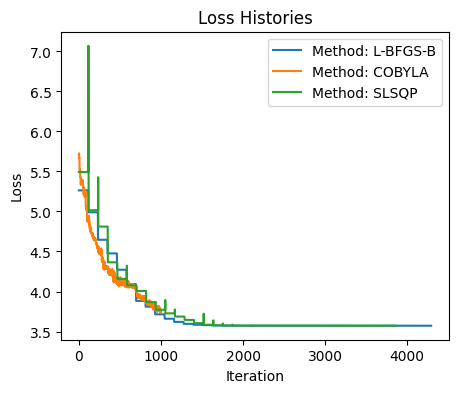

In [120]:
plot_loss_histories_one_plot_log(loss_histories)

In [121]:
accuracies_spambase, loss_histories_spambase, optimal_params = run_experiment(X, y)
average_accuracies_spambase = {method: np.mean(values) for method, values in accuracies_spambase.items()}

### Compare the methods

In [122]:
all_accuracies = {
    'Breast Cancer': accuracies_breast_cancer,
    'Banknote': accuracies_banknote,
    'Spambase': accuracies_spambase
}
all_average_accuracies = {
    'Breast Cancer': average_accuracies_breast_cancer,
    'Banknote': average_accuracies_banknote,
    'Spambase': average_accuracies_spambase
}

In [123]:
dataset_names = []
accuracies_data = []

for dataset_name, accuracies in all_accuracies.items():
    for method, acc_list in accuracies.items():
        dataset_names.append(f"{dataset_name} - {method}")
        accuracies_data.append(acc_list)

In [124]:
pd.DataFrame(all_average_accuracies)

,Breast Cancer,Banknote,Spambase
L-BFGS-B,0.973684,0.989091,0.897937
COBYLA,0.957895,0.989091,0.888382
SLSQP,0.973684,0.989091,0.897937


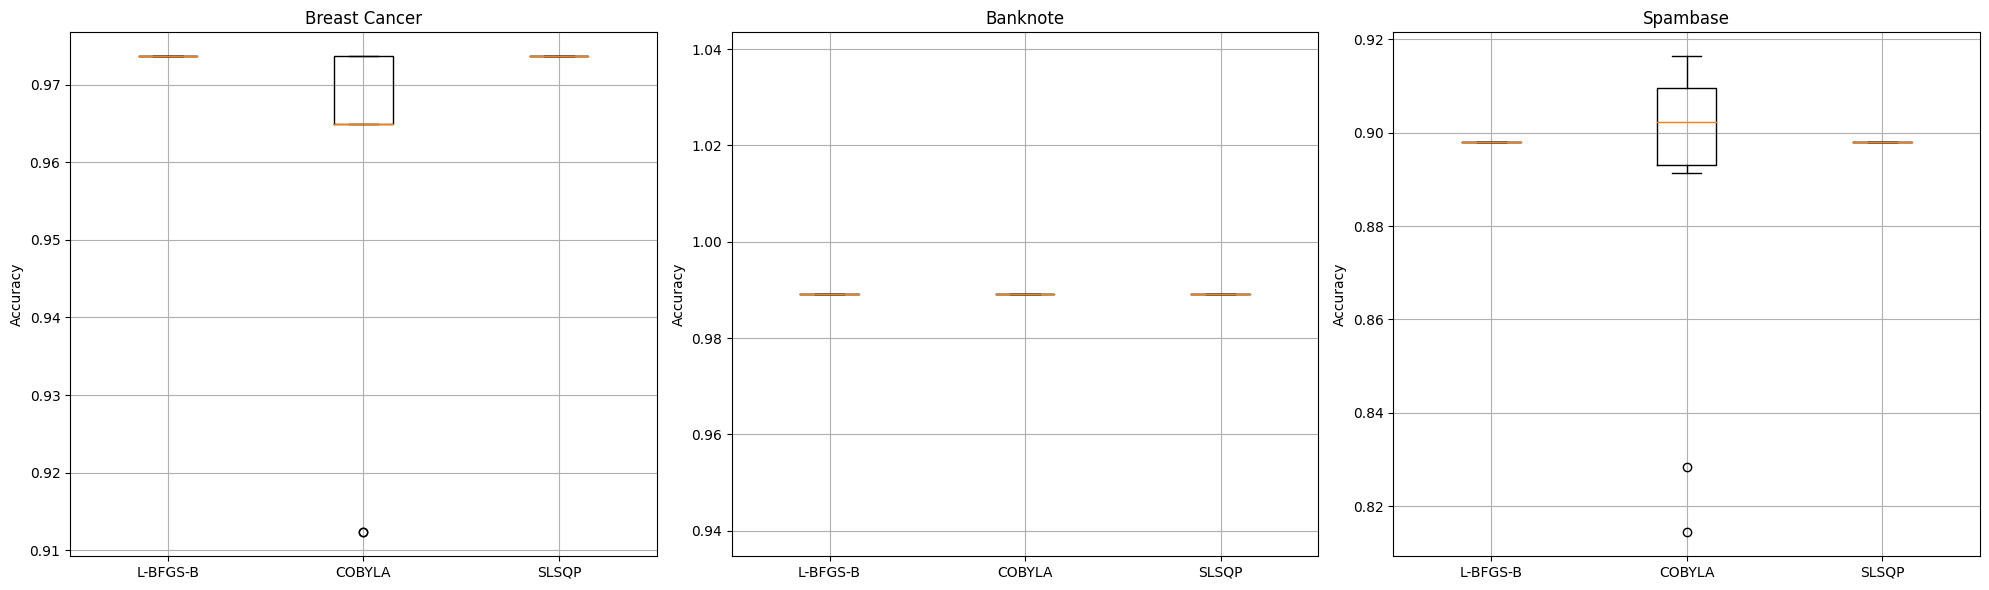

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for i, (dataset_name, accuracies) in enumerate(all_accuracies.items()):
    dataset_names = []
    accuracies_data = []

    for method, acc_list in accuracies.items():
        dataset_names.append(method)
        accuracies_data.append(acc_list)

    axs[i].boxplot(accuracies_data, labels=dataset_names)
    axs[i].set_title(dataset_name)
    axs[i].set_ylabel('Accuracy')
    axs[i].grid(True)

plt.tight_layout()
plt.show()